<h1 id="
Table of Contents">
Table of Contents<a class="anchor-link" href="#
Table of Contents"></a></h1>

<p style="font-weight:bold;"><a href="#1.-Data Preprocessing">1. Data Preprocessing</a></p>
<p style="font-weight:bold;"><a href="#2.-Training Data">2. Training Data</a></p>
<p style="font-weight:bold;"><a href="#3.-Training Status of Each Model">3. Training Status of Each Model</a></p>
<p style="font-weight:bold;"><a href="#4.-XGBoost Visualization">4. XGBoost Visualization</a></p>
<p style="font-weight:bold;"><a href="#5.-Cross-Validation">5. Cross-Validation</a></p>
<p style="font-weight:bold;"><a href="#6.-Confusion Matrix">6. Confusion Matrix</a></p>
<p style="font-weight:bold;"><a href="#7.-F1 Score">7. F1 Score</a></p>
<p style="font-weight:bold;"><a href="#8.-Real Stock Price Change VS Predict Stock Price Change">8. Real Stock Price Change VS Predict Stock Price Change Table</a></p>

<p style="font-weight:bold;color:#FFBB00;color:#FFBB00;font-size:18px;">Import Necessary Package</p>

In [1]:
import pandas as pd
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,GradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from numpy import loadtxt
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.font_manager import FontProperties 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

# install and import necessary packages for this project

<h2 id="1.- Data Preprocessing" style="color:#E63F00">1.  Data Preprocessing<a class="anchor-link" href="#1.- Data Preprocessing"></a></h2>

In [2]:
file = 'TextMiningDataset.xlsx' 

# Import file

In [3]:
xl = pd.ExcelFile(file)

# Use Pandas's function to read the data

In [4]:
print(xl.sheet_names)

# Print the name of the sheet

['TEST']


In [5]:
df1 = xl.parse('TEST')

In [6]:
df2 = df1.fillna(0)

# Fill null values

In [7]:
y = df2.iloc[:, 226]
X = df2.iloc[:, 3:226]
# Separating features X from the target varaible Y

In [8]:
X

,良率提升,穩定,量產,維持,高檔,7奈米,張忠謀,弊案,收賄,法說,...,量縮,不足,低迷,砍單,4奈米,大盤,S&P,費半,TSM,APPL
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109104,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,2.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109104,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.175840,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.175840,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.082164,1.201894,0.119411,-0.152922,0.119411
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.688065,-0.347346,-0.922800,1.488702,-0.922800
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.706692,-0.347346,-0.922800,1.488702,-0.922800
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.308091,0.675695,0.573881,-0.658774,0.573881
8,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.226490,-0.163463,0.317668,-0.026556,0.317668
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,3.946034,0.511679,0.217858,0.192903,0.217858


In [9]:
y

0      持平
1      持平
2      下跌
3      下跌
4      下跌
5      持平
6      下跌
7      持平
8      下跌
9      上漲
10     下跌
11     下跌
12     下跌
13     下跌
14     下跌
15     持平
16     持平
17     下跌
18     下跌
19     下跌
20     下跌
21     上漲
22     上漲
23     持平
24     持平
25     下跌
26     下跌
27     下跌
28     下跌
29     下跌
       ..
142    上漲
143    下跌
144    持平
145    持平
146    持平
147    下跌
148    下跌
149    下跌
150    上漲
151    上漲
152    上漲
153    上漲
154    上漲
155    上漲
156    持平
157    上漲
158    上漲
159    持平
160    持平
161    持平
162    持平
163    持平
164    上漲
165    持平
166    持平
167    持平
168    持平
169    上漲
170    持平
171    上漲
Name: 漲跌, Length: 172, dtype: object

<a href="#Back to Table of Contents">Back to Table of Contents</a>

<h2 id="2.-Training Data" style="color:#E63F00">2. Training Data<a class="anchor-link" href="#2.-Training Dat"></a></h2>

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [11]:
X_test


,良率提升,穩定,量產,維持,高檔,7奈米,張忠謀,弊案,收賄,法說,...,量縮,不足,低迷,砍單,4奈米,大盤,S&P,費半,TSM,APPL
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.976416,-0.415995,-0.993747,-1.739043,-0.993747
24,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.557262,-0.027390,-0.218776,-1.031106,-0.218776
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4.122200,-0.675206,-0.937500,-2.871685,-0.937500
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.117958,2.208442,1.327940,1.294745,1.327940
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.192801,2.422804,1.689417,0.734365,1.689417
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.082164,1.201894,0.119411,-0.152922,0.119411
37,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.553006,-0.063490,-1.597300,-1.061820,-1.597300
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.237359,0.025247,0.198803,0.194038,0.198803
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.386190,-0.518690,-1.249729,-0.221238,-1.249729
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.321232,0.575508,1.475275,-0.031241,1.475275


<a href="#Table of Contents">Back to Table of Contents</a>

<h2 id="3.-Training Status of Each Model" style="color:#E63F00">3. Training Status of Each Model<a class="anchor-link" href="#3.-Training Status of Each Model"></a></h2>

<p style="font-weight:bold;color:#003C9D;">A. Use GBDT algorithm to predict stock change</p>

In [12]:
params = {'n_estimators': 1000, 'max_depth':5, 'learning_rate' :0.01}

clf = GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
clf.predict(X_test)

array(['持平', '上漲', '下跌', '上漲', '上漲', '上漲', '持平', '上漲', '持平', '上漲', '持平',
       '下跌', '下跌', '上漲', '持平', '持平', '上漲', '下跌', '持平', '持平', '上漲', '下跌',
       '持平', '上漲', '持平', '上漲', '下跌', '下跌', '持平', '下跌', '上漲', '上漲', '上漲',
       '持平', '持平'], dtype=object)

In [13]:
clf.score(X_test, y_test)
# Test the predictive accuracy of GBDT model

0.7142857142857143

<p style="font-weight:bold;color:#003C9D;">B. Use Random Forest algorithm to predict stock change</p>

In [14]:
elf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=10)
elf = elf.fit(X,y)
elf.predict(X_test)

array(['持平', '持平', '下跌', '上漲', '上漲', '持平', '持平', '上漲', '持平', '上漲', '持平',
       '下跌', '下跌', '持平', '持平', '上漲', '上漲', '持平', '上漲', '持平', '上漲', '下跌',
       '持平', '上漲', '持平', '上漲', '下跌', '持平', '持平', '持平', '持平', '上漲', '持平',
       '持平', '持平'], dtype=object)

In [15]:
elf.score(X_test, y_test)
# Test the predictive accuracy of Random Forest

0.82857142857142863

<p style="font-weight:bold;color:#003C9D;">C. Use SVM algorithm to predict stock change</p>

In [16]:
dlf = SVC(kernel='rbf', probability=True)
dlf = dlf.fit(X,y)
dlf.predict(X_test)

array(['持平', '上漲', '下跌', '上漲', '上漲', '持平', '持平', '上漲', '持平', '上漲', '持平',
       '下跌', '下跌', '上漲', '持平', '持平', '上漲', '持平', '上漲', '持平', '上漲', '下跌',
       '上漲', '上漲', '持平', '上漲', '下跌', '持平', '持平', '持平', '持平', '持平', '持平',
       '持平', '持平'], dtype=object)

In [17]:
dlf.score(X_test, y_test)
# Test the predictive accuracy of SVM

0.82857142857142863

<p style="font-weight:bold;color:#003C9D;">D. Use voting ensemble algorithm to predict stock change</p>

In [18]:
flf = VotingClassifier(estimators=[('GradientBoostingClassifier', clf), ('RandomForestClassifier', elf), ('svc', dlf)], voting='soft', weights=[2,1,2])

In [19]:
flf = flf.fit(X,y)

In [20]:
flf.predict(X_test)


array(['持平', '持平', '下跌', '上漲', '上漲', '下跌', '持平', '上漲', '持平', '上漲', '下跌',
       '下跌', '下跌', '上漲', '持平', '下跌', '上漲', '持平', '上漲', '持平', '上漲', '下跌',
       '上漲', '上漲', '持平', '上漲', '下跌', '下跌', '持平', '持平', '持平', '上漲', '持平',
       '持平', '持平'], dtype=object)

In [21]:
flf.score(X_test, y_test)
# Test the predictive accuracy of voting ensemble

1.0

In [22]:
params1 = {
 'learning_rate' :0.01,
 'n_estimators':1000,
 'max_depth':9,
 'min_child_weight':6,
 'gamma':0,
 'subsample':0.8,
 'colsample_bytree':0.8,
 'reg_alpha':0.005,
 'objective': 'binary:logistic',
 'nthread':4,
 'scale_pos_weight':1,
 'seed':7}

llf = XGBClassifier(**params1)

llf.fit(X, y)
llf.predict(X_test)

array(['持平', '持平', '下跌', '上漲', '上漲', '下跌', '持平', '上漲', '持平', '上漲', '下跌',
       '下跌', '下跌', '上漲', '持平', '持平', '上漲', '下跌', '上漲', '持平', '上漲', '下跌',
       '上漲', '上漲', '持平', '上漲', '下跌', '下跌', '持平', '持平', '持平', '上漲', '持平',
       '持平', '持平'], dtype=object)

In [23]:
llf.score(X_test, y_test)
# Test the predictive accuracy of XGBoost

0.94285714285714284

<a href="#Back to Table of contents">Table of contents</a>

<h2 id="4.-XGBoost Visualization" style="color:#E63F00">4. XGBoost Visualization<a class="anchor-link" href="#4.-XGBoost Visualization"></a></h2>

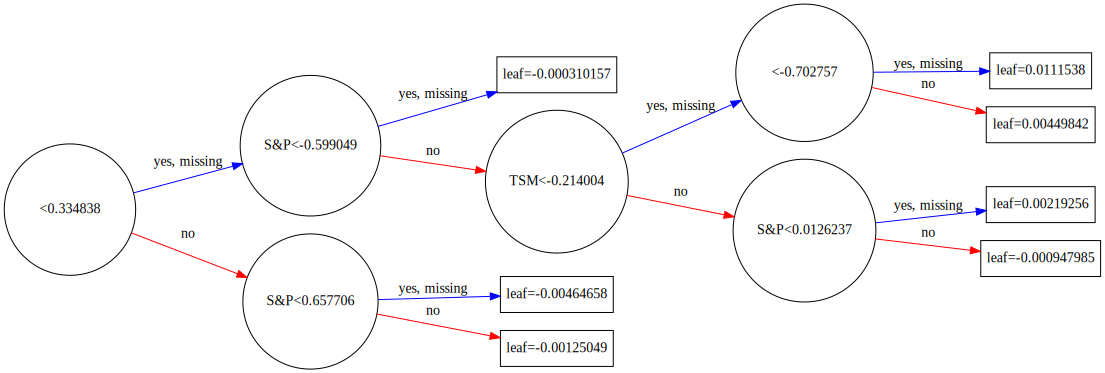

In [24]:
tree= xgb.to_graphviz(llf, num_trees=14, rankdir='LR')
tree


<a href="#Back to Table of Contents">Back to Table of Contents</a>

<h2 id="5.-Cross-Validation" style="color:#E63F00">5. Cross-Validation<a class="anchor-link" href="#5.-Cross-Validation"></a></h2>

In [25]:

for lf, label in zip([clf, elf, dlf, flf, llf], ['GradientBoostingClassifier', 'RandomForestClassifier', 'svc', 'VotingClassifier', 'XGBoost']):
    scores = cross_val_score(lf, X, y, cv=20, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
# Check the cross-validation accuracy within one standard deviation for each dataset

Accuracy: 0.6775 (+/- 0.22) [GradientBoostingClassifier]
Accuracy: 0.6206 (+/- 0.18) [RandomForestClassifier]
Accuracy: 0.6373 (+/- 0.20) [svc]
Accuracy: 0.6834 (+/- 0.20) [VotingClassifier]
Accuracy: 0.7006 (+/- 0.18) [XGBoost]


<a href="#Table of Contents">Back to Table of Contents</a>

<h2 id="6.-Confusion Matrix" style="color:#E63F00">6. Confusion Matrix<a class="anchor-link" href="#6.-Confusion Matrix"></a></h2>

<p style="font-weight:bold;color:#FFBB00;color:#FFBB00;font-size:18px;">Parameter Tuning</p>

In [26]:
t = list(y_test)
r = clf.predict(X_test) #GBDT
f = dlf.predict(X_test) #RandomForest
g = elf.predict(X_test) #SVM
m = flf.predict(X_test) #Voting
o = llf.predict(X_test) #XGBOOST

p = {'上漲':1, '持平' :0, '下跌' :-1}
t1 =[p.get(n, n) for n in t]
r1 =[p.get(n, n) for n in r]
f1 =[p.get(n, n) for n in f]
g1 =[p.get(n, n) for n in g]
m1 =[p.get(n, n) for n in m]
o1 =[p.get(n, n) for n in o]

# Transfer stock price increase（上漲） to 1，stock price decrease（下跌） to -1, and stock price stable（持平） to 0


In [27]:

unique_elements, counts_elements = np.unique(t, return_counts=True)
unique1_elements, counts1_elements = np.unique(r, return_counts=True)
unique2_elements, counts2_elements = np.unique(f, return_counts=True)
unique3_elements, counts3_elements = np.unique(g, return_counts=True)
unique4_elements, counts4_elements = np.unique(m, return_counts=True)
unique5_elements, counts5_elements = np.unique(o, return_counts=True)


print(np.asarray((unique_elements, counts_elements, 't')))
print(np.asarray((unique1_elements, counts1_elements, 'r')))
print(np.asarray((unique2_elements, counts2_elements, 'f')))
print(np.asarray((unique3_elements, counts3_elements, 'g')))
print(np.asarray((unique4_elements, counts4_elements, 'm')))
print(np.asarray((unique5_elements, counts5_elements, 'o')))

# Extract the single target value from the test data

[array(['上漲', '下跌', '持平'],
      dtype='<U2')
 array([12,  9, 14], dtype=int64) 't']
[array(['上漲', '下跌', '持平'], dtype=object) array([14,  8, 13], dtype=int64)
 'r']
[array(['上漲', '下跌', '持平'], dtype=object) array([12,  5, 18], dtype=int64)
 'f']
[array(['上漲', '下跌', '持平'], dtype=object) array([11,  5, 19], dtype=int64)
 'g']
[array(['上漲', '下跌', '持平'], dtype=object) array([12,  9, 14], dtype=int64)
 'm']
[array(['上漲', '下跌', '持平'], dtype=object) array([12,  9, 14], dtype=int64)
 'o']


<p style="font-weight:bold;color:#003C9D;">A. GBDT Confusion Matrix</p>

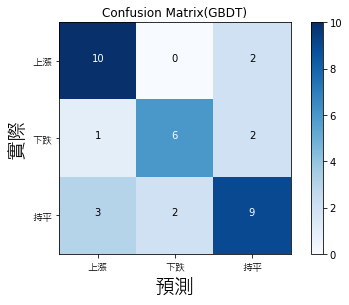

In [28]:
font = FontProperties(fname=r'C:/Users/genio/Algorithm/msjh.ttc')

# Import a Chinese font and pass the font path into the FontProperties function

class_names = unique1_elements


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, r)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(GBDT)')


plt.show()

<p style="font-weight:bold;color:#003C9D;">B. Random Forest Confusion Matrix</p>

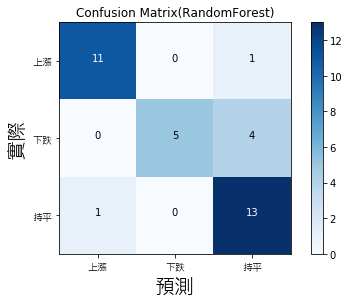

In [29]:
class_names = unique2_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,  fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, f)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(RandomForest)')


plt.show()

<p style="font-weight:bold;color:#003C9D;">C. SVM Confusion Matrix</p>

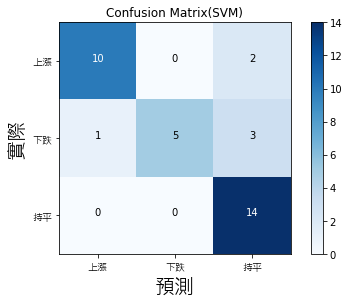

In [30]:
class_names = unique3_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Confusion Matrix Calculation
cnf_matrix = confusion_matrix(t, g)
np.set_printoptions(precision=2)

# Plot Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(SVM)')

plt.show()


<p style="font-weight:bold;color:#003C9D;">D. Voting Confusion Matrix</p>

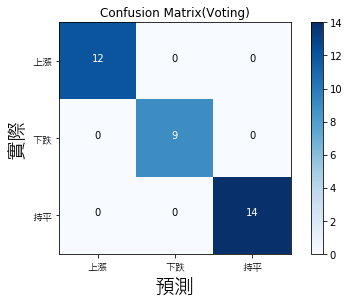

In [31]:
class_names = unique4_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, m)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(Voting)')

plt.show()


<p style="font-weight:bold;color:#003C9D;">E. XGBoost Confusion Matrix</p>

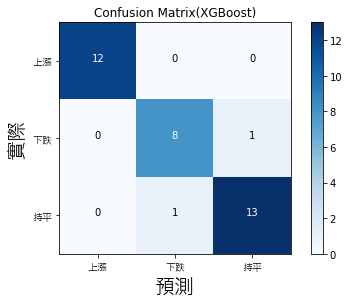

In [32]:

font = FontProperties(fname=r'C:/Users/genio/Algorithm/msjh.ttc')

class_names = unique5_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,  fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, o)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                       title='Confusion Matrix(XGBoost)')

plt.show()


<a href="#Table of Contents">Back to Table of Contents</a>

<h2 id="7.-F1Score" style="color:#E63F00">7. F1 Score<a class="anchor-link" href="#7.-F1Score"></a></h2>

<p style="font-weight:bold;color:#003C9D;">A. GBDT F1 Score</p>

In [33]:
target_names = '上漲', '持平', '下跌'
print(classification_report(t, r, target_names=target_names))

             precision    recall  f1-score   support

         上漲       0.71      0.83      0.77        12
         持平       0.75      0.67      0.71         9
         下跌       0.69      0.64      0.67        14

avg / total       0.71      0.71      0.71        35



<p style="font-weight:bold;color:#003C9D;">B. Random Forest F1 Score</p>

In [34]:
target_names = '上漲', '持平', '下跌'
print(classification_report(t, f, target_names=target_names))

             precision    recall  f1-score   support

         上漲       0.92      0.92      0.92        12
         持平       1.00      0.56      0.71         9
         下跌       0.72      0.93      0.81        14

avg / total       0.86      0.83      0.82        35



<p style="font-weight:bold;color:#003C9D;">C. SVM F1 Score</p>

In [35]:
target_names = '上漲', '持平', '下跌'
print(classification_report(t, g, target_names=target_names))

             precision    recall  f1-score   support

         上漲       0.91      0.83      0.87        12
         持平       1.00      0.56      0.71         9
         下跌       0.74      1.00      0.85        14

avg / total       0.86      0.83      0.82        35



<p style="font-weight:bold;color:#003C9D;">D. Voting F1 Score</p>

In [36]:
target_names ='上漲', '持平', '下跌'
print(classification_report(t, m, target_names=target_names))

             precision    recall  f1-score   support

         上漲       1.00      1.00      1.00        12
         持平       1.00      1.00      1.00         9
         下跌       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        35



<p style="font-weight:bold;color:#003C9D;">E. XGBoost F1 Score</p>

In [37]:
target_names = '上漲', '持平', '下跌'
c= print(classification_report(t, o, target_names=target_names))


             precision    recall  f1-score   support

         上漲       1.00      1.00      1.00        12
         持平       0.89      0.89      0.89         9
         下跌       0.93      0.93      0.93        14

avg / total       0.94      0.94      0.94        35



<a href="#Table of Contents">Back to Table of Contents</a>

<h2 id="8.-Real Stock Price Change VS Predicting Stock Price Change Table" style="color:#E63F00">8. Real Stock Price Change VS Predicting Stock Price Change Table<a class="anchor-link" href="#8.-Real Stock Price Change VS Predicting Stock Price Change Table"></a></h2>

<p style="font-weight:bold;color:#003C9D;">A. GBDT Real VS Predicting</p>

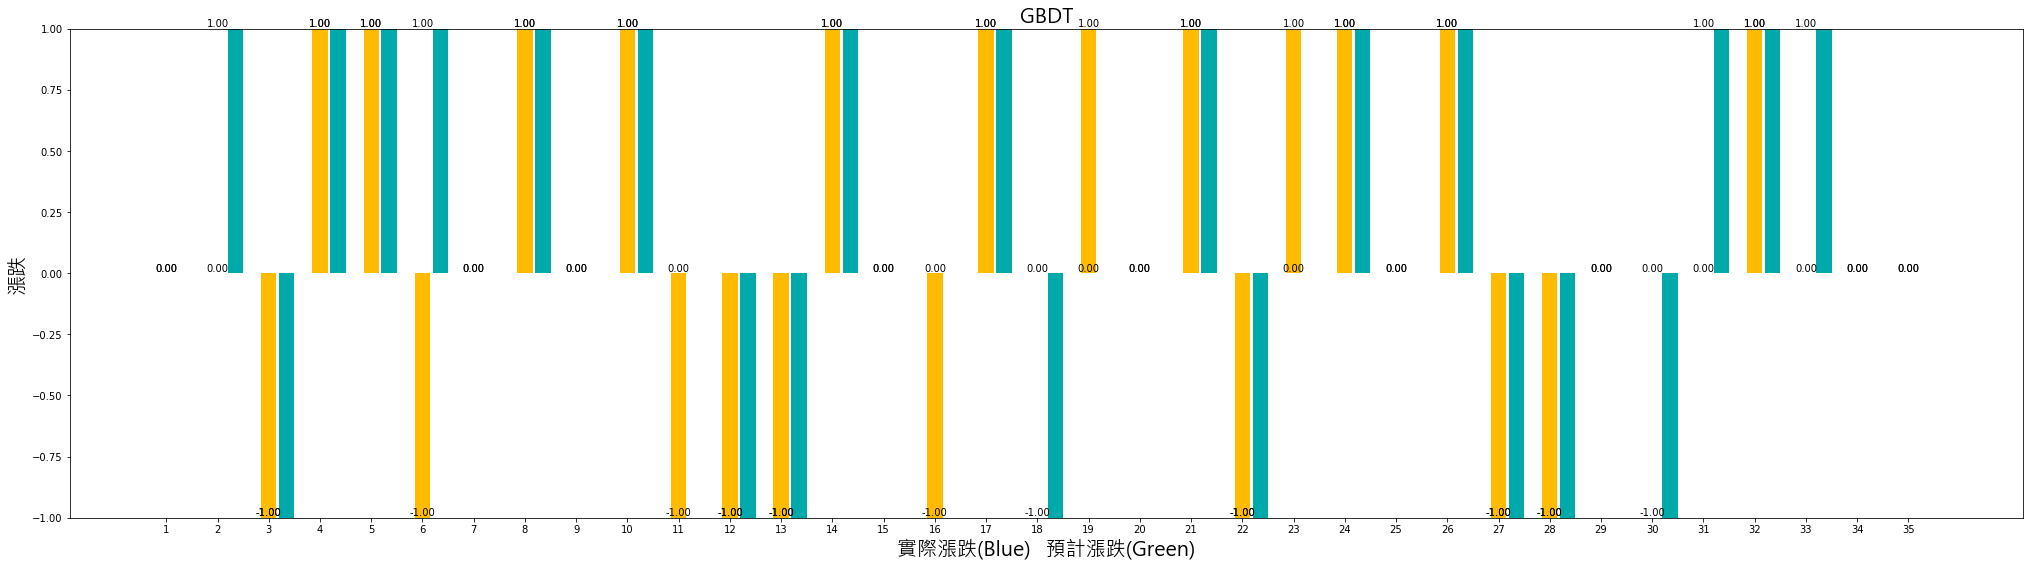

In [38]:

plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1

objects = range(1,36)

y_pos = np.arange(len(objects))

plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')

plt.bar(X+0.35,r1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')

plt.xlabel('實際漲跌(Blue)   預計漲跌(Green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)

plt.xticks(y_pos+1, objects)

plt.title('GBDT',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,r1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)

plt.show()

<p style="font-weight:bold;color:#003C9D;">B. Random Forest GBDT Real VS Predicting</p>

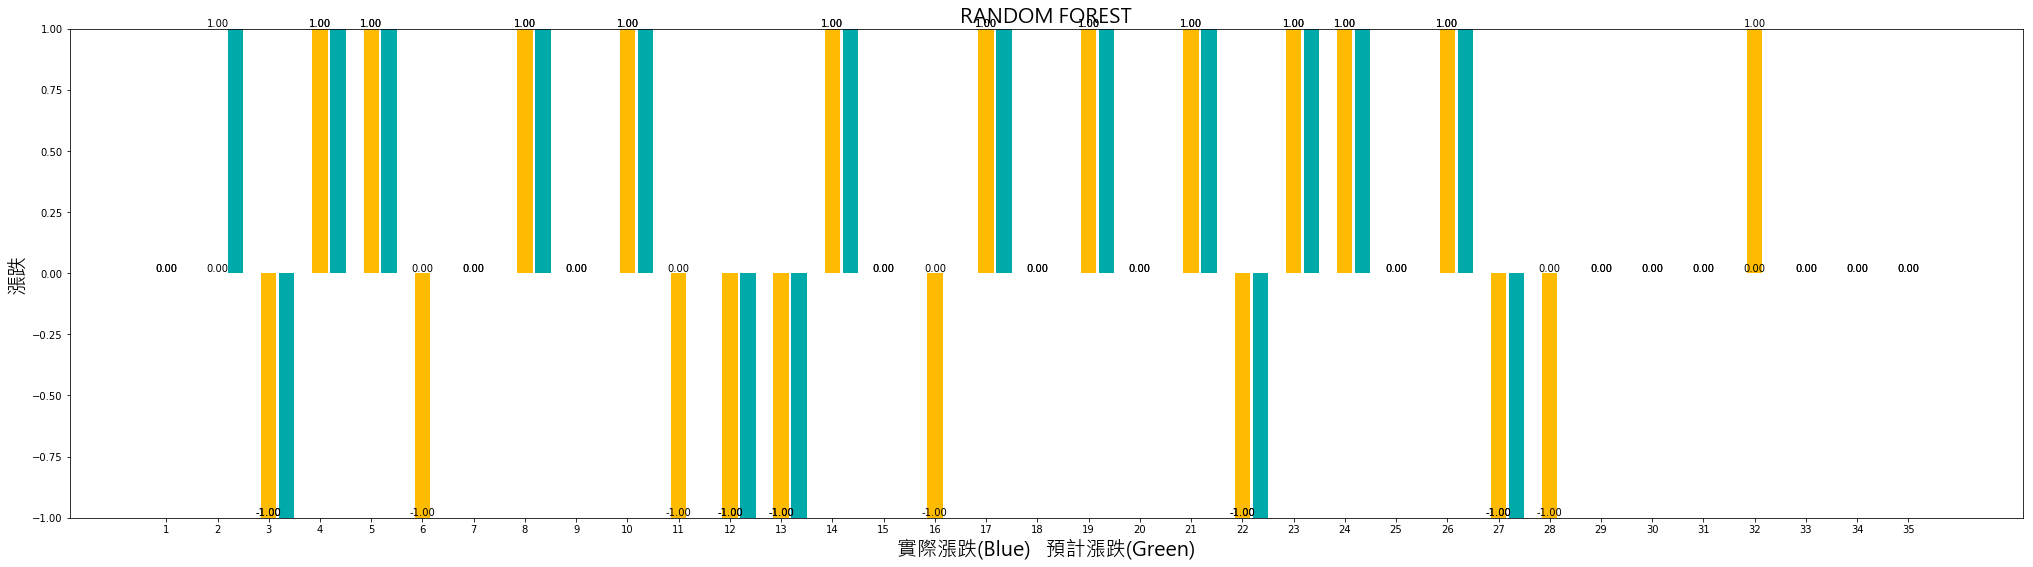

In [39]:
plt.figure(figsize=(35,9))
n = 35

X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')
plt.bar(X+0.35,f1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(Green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('RANDOM FOREST',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,f1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<p style="font-weight:bold;color:#003C9D;">C. SVM Real VS Predicting</p>

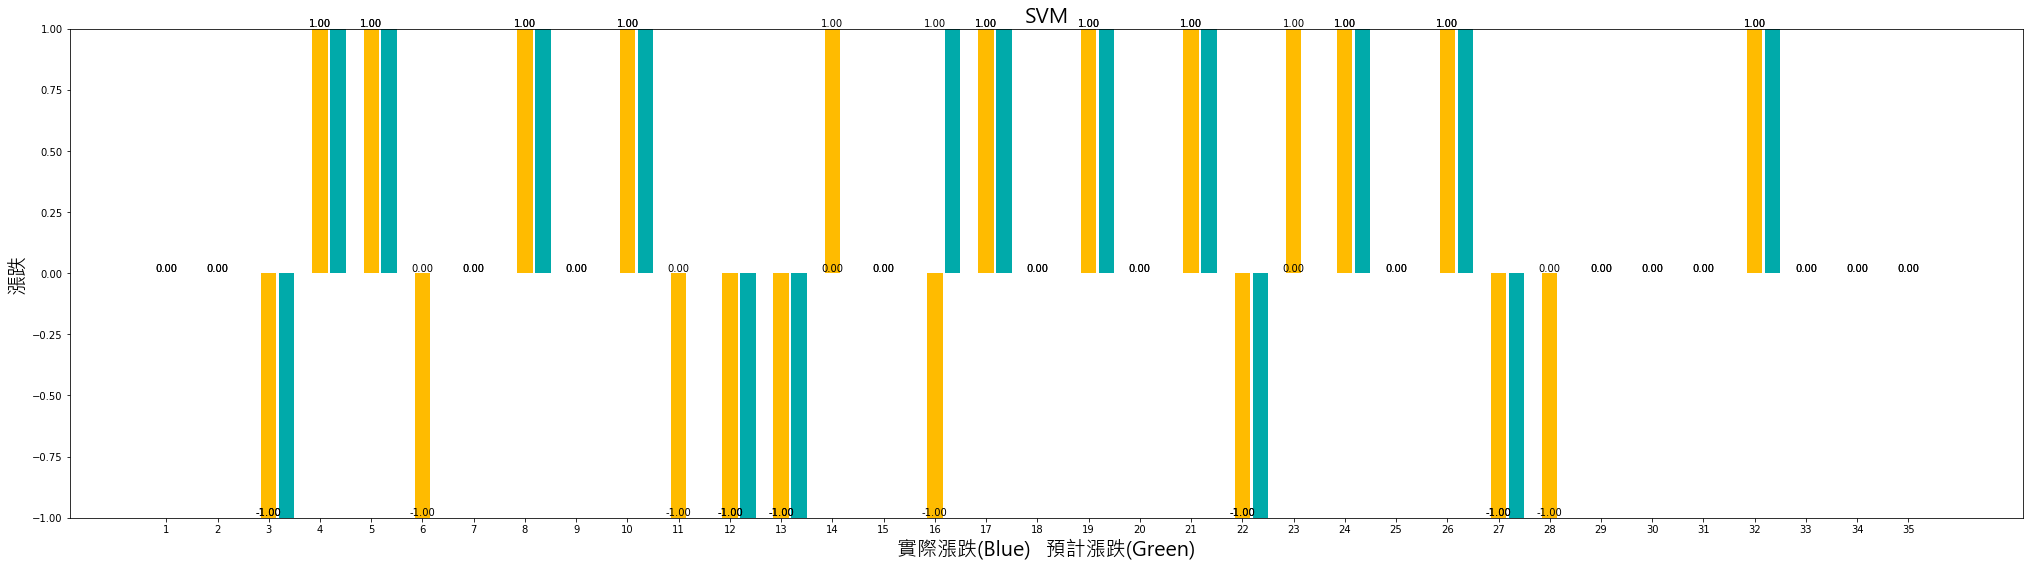

In [40]:
plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')
plt.bar(X+0.35,g1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(Green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('SVM',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,g1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<p style="font-weight:bold;color:#003C9D;">D. Voting Real VS Predicting</p>

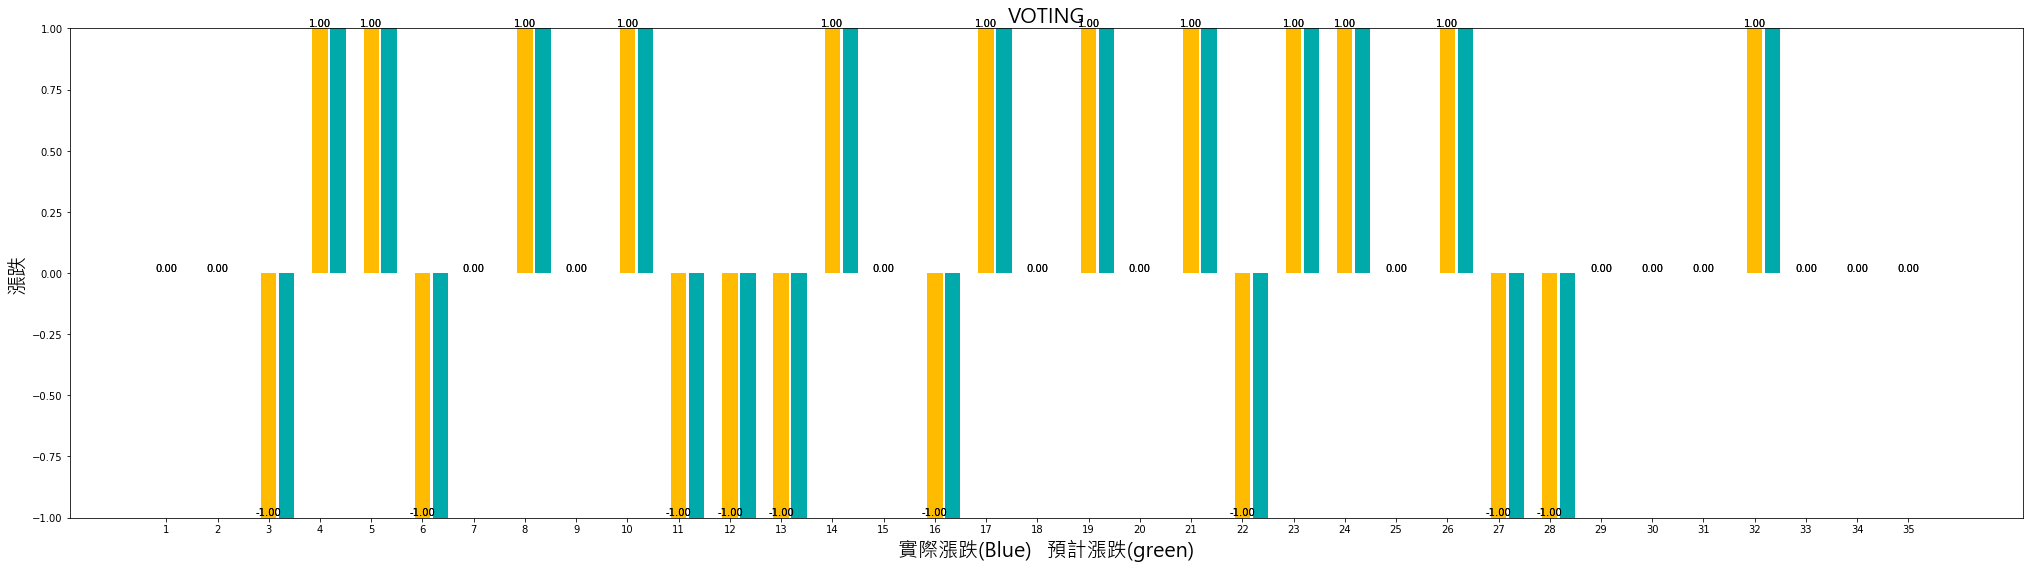

In [41]:
plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')
plt.bar(X+0.35,m1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('VOTING',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,m1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<p style="font-weight:bold;color:#003C9D;">E. XGBoost Real VS Predicting</p>

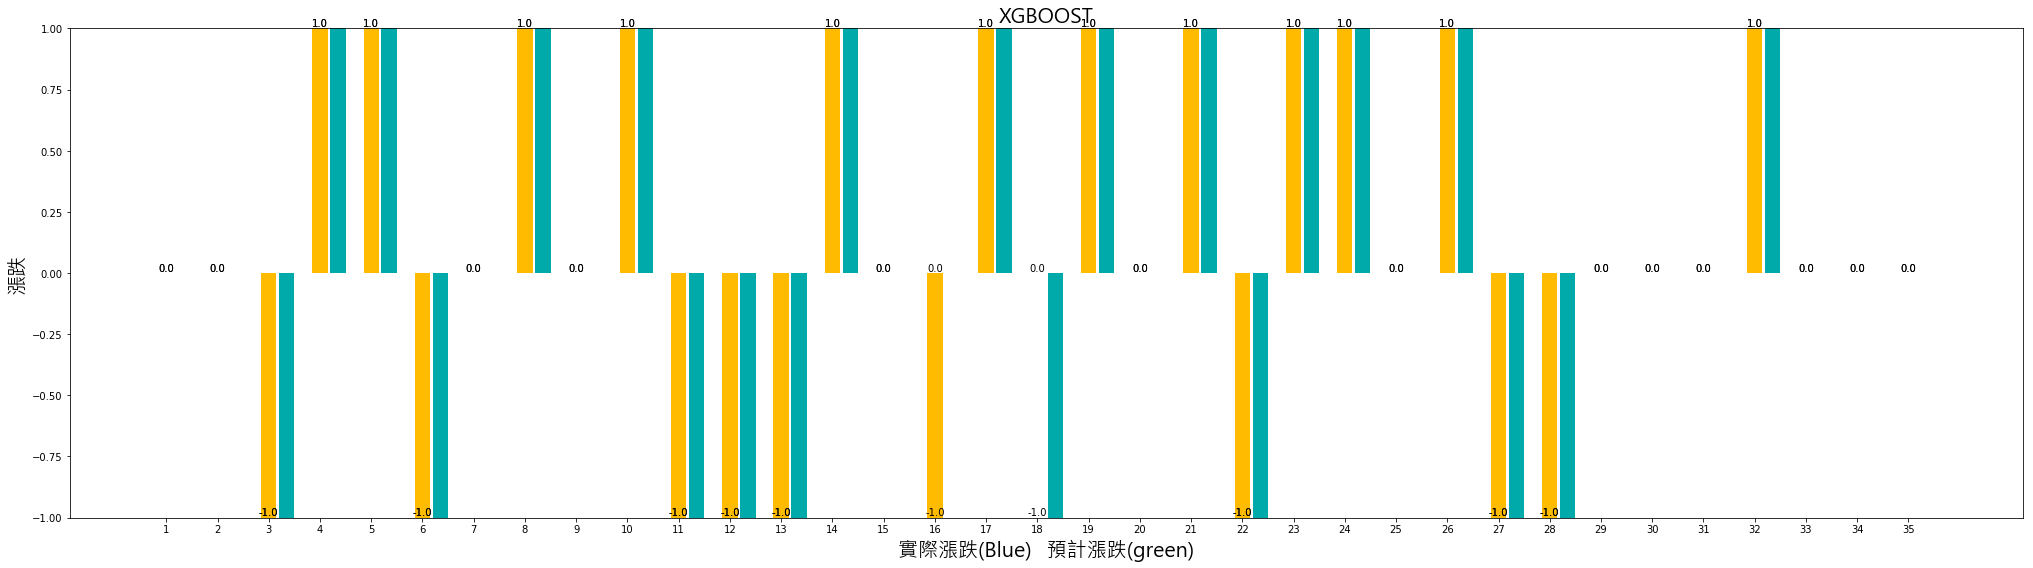

In [42]:
plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white' )
plt.bar(X+0.35,o1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('XGBOOST',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.1f' % y,  ha='center', va= 'bottom')

for x,y in zip(X,o1):
    plt.text(x, y, '%.1f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<a href="#Table of Contents">Back to Table of Contents</a>